# What is Fisher Score 
Fisher score is one of the most widely used supervised feature selection methods. However, it selects each feature independently according to their scores under the
Fisher criterion, which leads to a suboptimal subset of features.

# Chi Square (χ2) Test
A chi-squared test, also written as X2

test, is any statistical hypothesis test where the sampling distribution of the test statistic is a chi-squared distribution.

chi-square test measures dependence between stochastic variables, so using this function weeds out the features that are the most likely to be independent of class and therefore irrelevant for classification.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.metrics import accuracy_score

In [3]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
#Let’s drop labels age and dect from the dataset.
titanic.drop(labels = ['age', 'deck'], axis = 1, inplace = True)
titanic = titanic.dropna()
titanic.isnull().sum()

survived       0
pclass         0
sex            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [7]:
data = titanic[['pclass', 'sex', 'sibsp', 'parch', 'embarked', 'who', 'alone']].copy()
data.head()

,pclass,sex,sibsp,parch,embarked,who,alone
0,3,male,1,0,S,man,False
1,1,female,1,0,C,woman,False
2,3,female,0,0,S,woman,True
3,1,female,1,0,S,woman,False
4,3,male,0,0,S,man,True


In [8]:
data.isnull().sum()

pclass      0
sex         0
sibsp       0
parch       0
embarked    0
who         0
alone       0
dtype: int64

In [9]:
sex = {'male': 0, 'female': 1}
data['sex'] = data['sex'].map(sex)
data.head()

,pclass,sex,sibsp,parch,embarked,who,alone
0,3,0,1,0,S,man,False
1,1,1,1,0,C,woman,False
2,3,1,0,0,S,woman,True
3,1,1,1,0,S,woman,False
4,3,0,0,0,S,man,True


In [10]:
ports = {'S': 0, 'C': 1, 'Q': 2}
data['embarked'] = data['embarked'].map(ports)

In [11]:
who = {'man': 0, 'woman': 1, 'child': 2}
data['who'] = data['who'].map(who)

In [12]:
alone = {True: 1, False: 0}
data['alone'] = data['alone'].map(alone)
data.head()

,pclass,sex,sibsp,parch,embarked,who,alone
0,3,0,1,0,0,0,0
1,1,1,1,0,1,1,0
2,3,1,0,0,0,1,1
3,1,1,1,0,0,1,0
4,3,0,0,0,0,0,1


# F_Score

In [13]:
X = data.copy()
y = titanic['survived']
X.shape, y.shape

((889, 7), (889,))

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
f_score = chi2(X_train, y_train)
f_score

(array([ 22.65169202, 152.91534343,   0.52934285,  10.35663782,
         16.13255653, 161.42431175,  13.4382363 ]),
 array([1.94189138e-06, 3.99737147e-35, 4.66883271e-01, 1.29009955e-03,
        5.90599986e-05, 5.52664700e-37, 2.46547298e-04]))

In [15]:
p_values = pd.Series(f_score[1], index = X_train.columns)
p_values.sort_values(ascending = True, inplace = True)
p_values

who         5.526647e-37
sex         3.997371e-35
pclass      1.941891e-06
embarked    5.906000e-05
alone       2.465473e-04
parch       1.290100e-03
sibsp       4.668833e-01
dtype: float64

Text(0.5, 1.0, 'pvalues with respect to features')

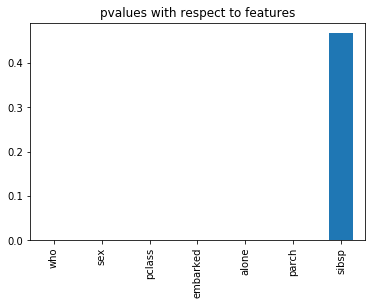

In [16]:
p_values.plot.bar()
plt.title('pvalues with respect to features')

In [17]:
X_train_2 = X_train[['who', 'sex']]
X_test_2 = X_test[['who', 'sex']]

In [18]:
def run_randomForest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy: ', accuracy_score(y_test, y_pred))

In [19]:
%%time
run_randomForest(X_train_2, X_test_2, y_train, y_test)

Accuracy:  0.7191011235955056
CPU times: user 276 ms, sys: 72.7 ms, total: 349 ms
Wall time: 393 ms


In [20]:
X_train_3 = X_train[['who', 'sex', 'pclass']]
X_test_3 = X_test[['who', 'sex', 'pclass']]

In [21]:
%%time
run_randomForest(X_train_3, X_test_3, y_train, y_test)

Accuracy:  0.7415730337078652
CPU times: user 328 ms, sys: 86 ms, total: 414 ms
Wall time: 499 ms


In [22]:
X_train_4 = X_train[['who', 'sex', 'pclass', 'embarked']]
X_test_4 = X_test[['who', 'sex', 'pclass', 'embarked']]

In [23]:
%%time
run_randomForest(X_train_4, X_test_4, y_train, y_test)

Accuracy:  0.7584269662921348
CPU times: user 294 ms, sys: 72.4 ms, total: 366 ms
Wall time: 498 ms


In [24]:
X_train_5 = X_train[['who', 'sex', 'pclass', 'embarked', 'alone']]
X_test_5 = X_test[['who', 'sex', 'pclass', 'embarked', 'alone']]  

In [25]:
run_randomForest(X_train_5, X_test_5, y_train, y_test)

Accuracy:  0.7528089887640449


In [26]:
%%time
run_randomForest(X_train, X_test, y_train, y_test)

Accuracy:  0.7359550561797753
CPU times: user 302 ms, sys: 74.8 ms, total: 377 ms
Wall time: 404 ms


In [28]:
import scipy.stats as stats
from scipy.stats import chi2


def chi_square(dataset, col1, col2):
  print("Relationship Between ", col1, "  ", col2)
  dataset_table = pd.crosstab(dataset[col1], dataset[col2])
  #print(dataset_table)
  
  Observed_Values = dataset_table.values 
  #print("Observed Values :-\n",Observed_Values)
  
  val = stats.chi2_contingency(dataset_table)
  #print(val)
  
  Expected_Values=val[3]
  
  no_of_rows=len(dataset_table.iloc[0:2,0])
  no_of_columns=len(dataset_table.iloc[0,0:2])
  ddof=(no_of_rows-1)*(no_of_columns-1)
  #print("Degree of Freedom:",ddof)
  alpha = 0.05
  
  chi_square = sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
  chi_square_statistic = chi_square[0]+chi_square[1]
  
  print("chi-square statistic:-",chi_square_statistic)

  critical_value=chi2.ppf(q=1-alpha,df=ddof)
  print('critical_value:',critical_value)

  #p-value
  p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
  print('p-value:',p_value)
  print('Significance level: ',alpha)
  print('Degree of Freedom: ',ddof)
  

  if chi_square_statistic>=critical_value:
      print("Reject H0,There is a relationship between 2 categorical variables")
  else:
      print("Retain H0,There is no relationship between 2 categorical variables")
      
  if p_value<=alpha:
      print("Reject H0,There is a relationship between 2 categorical variables")
  else:
      print("Retain H0,There is no relationship between 2 categorical variables")

  print("\n")

In [30]:
Cat_Columns = ['who', 'sex', 'pclass', 'embarked']

for col in Cat_Columns:
  chi_square(data, "alone", col)


Relationship Between  alone    who
chi-square statistic:- 87.12224139229635
critical_value: 3.841458820694124
p-value: 0.0
Significance level:  0.05
Degree of Freedom:  1
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


Relationship Between  alone    sex
chi-square statistic:- 83.77902242188794
critical_value: 3.841458820694124
p-value: 0.0
Significance level:  0.05
Degree of Freedom:  1
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


Relationship Between  alone    pclass
chi-square statistic:- 10.282082406444491
critical_value: 3.841458820694124
p-value: 0.001343282567887516
Significance level:  0.05
Degree of Freedom:  1
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


Relationship Between  alone    embarked
chi-square statistic:- 6